# Optimizatino for machine learning / deep  learning: homework 1

### Python 3 / Jupyter install instructions

For those having trouble getting Jupyter notebook up and running I recommend installing the Anaconda Python 3 distribution - which you can [find here](https://www.anaconda.com/download/).  The basic distribution includes a number of useful libraries - including numpy, matplotlib, and Jupyter itself - and makes it easier to install additional libraries as well.  Just make sure you download the Python 3.6 distribution if you do this.

You will also need the automatic differentiator [autograd](https://github.com/HIPS/autograd) for later in the course (you will not need this for the currenct homework) - you can install this package via your terminal by typing 

``pip install autograd``

In this set of exercise you will build out the Automatic Differentiator we discussed in class - you can see the [course presentation on this subject here](https://jermwatt.github.io/mlrefined/presentations/Computational_Calculus/Part_4_presentation_AD_forward_method.slides.html#/), and the [corresponding set of notes here](https://jermwatt.github.io/mlrefined/blog_posts/Computational_Calculus/Part_4_AD_forward_method.html).

#### <span style="color:#a50e3e;">Exercise 1. </span>  Build out the Automatic Differentiator we started in class: Part 1

Re-produce the Automatic Differentiator discussed in class.  This should include the following elementary function / operation derivative rules:

- **elementary derivative rules for functions:** sin, cos, tanh
- **elementary derivative rules for operatrions:** addition, multiplication, power

All of these components can be found in the presentation / notes.  Overload the addition, multiplication, and power operators for your MyTuple class so that you can write out / differentiate input functions more naturally in Python.

Once you have put together these pieces complete the two panel subplot we started in class - rolling it into a Python function called ``plot_it``.  This Python function should take in the function ``g`` whose derivative you wish to compute and plot the function and its derivative over a range of input in the left and right panels respectively.  A wrapper for this function is given below, and a demonstration of its usage follows.

In [28]:
# we will need numpy and the plotting library matplotlib for this 
import numpy as np
import matplotlib.pyplot as plt

# a simple plotting mechanism for visualizing your function / derivative
def plot_it(g):
    # setup plot
    f, (ax1, ax2) = plt.subplots(1, 2,figsize = (13,3))

    # compute function / derivative values
    s = np.linspace(-6,6,1000)
    g_vals = []
    dgdw_vals = []
    for val in s:
        # make instance of tuple
        tup = MyTuple(val = val)
        
        # evaluate tuple through input function
        tup1 = g(tup)
        
        # strip off function / derivative evaluations and store
        g_vals.append(tup1.val)
        dgdw_vals.append(tup1.der)
    
    # plot everything
    ax1.plot(s,g_vals,c = 'k')
    ax1.set_title('function')       # include title
    ax2.plot(s,dgdw_vals,c = 'r')
    ax2.set_title('derivative')     # include title
    plt.show()          # this shows figure inline

In the next cell the completed Automatic Differentiator and ``plot_it`` function are used to differentiate / illustrate the function

\begin{equation}
g(w) = \text{sin}(w)w + \text{tanh}(w)
\end{equation}

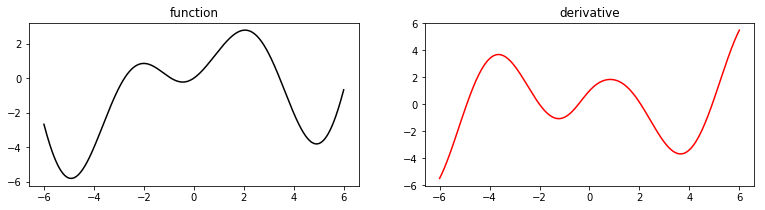

In [32]:
# define new function
g = lambda w:  sin(w)*w + tanh(w)

# plot over a range of values
plot_it(g)

#### <span style="color:#a50e3e;">Exercise 2. </span>  Build out the Automatic Differentiator we started in class: Part 2

Code up the maximum of two functions derivative rule given in Table 1 of the presentation / notes, adding it to your list of derivative rules.  Test your work with the functions

\begin{equation}
g(w) = \text{max}\left(w,\text{tanh}(\text{cos}(w))\right)
\end{equation}

and

\begin{equation}
g(w) = \text{max}(0,sin(w))
\end{equation}

as shown in the cells following this one.  Note: this will overload the Python built-in function ``max`` for MyTuple objects.

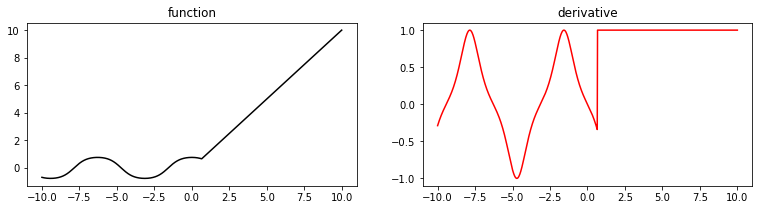

In [10]:
# define new function
g = lambda w: max(w,tanh(cos(w)))

# plot over a range of values
plot_it(g)

The second test function - shown below - illustrates the classic usage of the relu function: AC to DC power conversion.

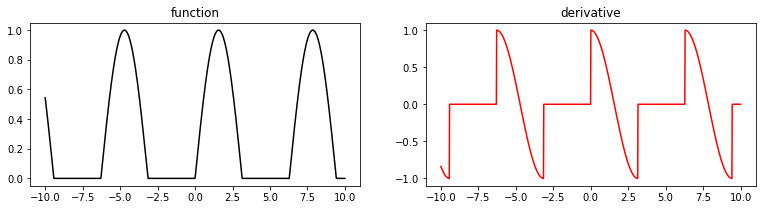

In [11]:
# define new function
g = lambda w: max(0,sin(w))

# plot over a range of values
plot_it(g)

#### <span style="color:#a50e3e;">Exercise 3. </span>  Build out the Automatic Differentiator we started in class: Part 3

At this point your Automatic Differentiator is pretty robust, and you should be able to run the cell below without problems.  The function given there is called a *single hidden layer neural network basis function using a tanh activation*, it looks like this in general

\begin{equation}
g(w) = a_0 + \sum_{n=1}^{N}\text{tanh}\left(a_{1,n} + a_{2,n}w\right)
\end{equation}

This sort of function is often used when performing *nonlinear regression* - that is when you want to fit a curve t a set of input/output data in order to e.g., make predictions (which we discuss later in the course).  

When you activate the cell all of the $a_0$, $a_{1,n}$ and $a_{2,n}$ are set randomly - so you will not reproduce the same image shown here.  Just make sure you can run the cell - and that when run you get a fairly wiggly looking function in the left panel.  In theory the larger $N$ becomes, the wigglier the function can become.

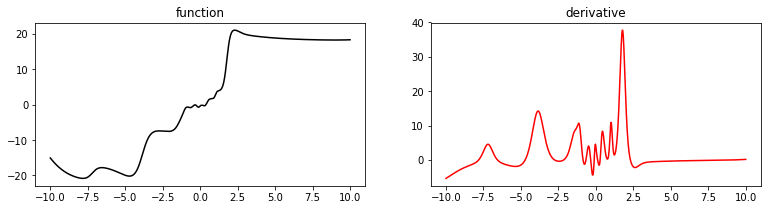

In [18]:
# define new function
N = 20
a = 5*np.random.randn(N,3)
a_0 = 5*np.random.randn(1,1)[0][0]
def g(w):
    c = a_0
    for i in range(N):
        c += a[i][0]*tanh(a[i][1] + a[i][2]*w)
    return c
        
# plot over a range of values
plot_it(g)

## Automatic Differentiator

In [4]:
import numpy as np
import matplotlib.pyplot as plt

class MyTuple:
    '''
    The basic object manipulated by an AD calculator
    Instances of this class is a tuple containining one 
    function/derivative evaluation.
    '''
    def __init__(self,**kwargs):
        # variables for the value (val) and derivative (der) of our input function 
        self.val = 0
        self.der = 1    
        
        # re-assign these default values 
        if 'val' in kwargs:
            self.val = kwargs['val']
        if 'der' in kwargs:
            self.der = kwargs['der']
     
    # our implementation of the addition rules from Table 2
    def __add__(self,a):
        # Create output evaluation and derivative object
        c = MyTuple()

        # switch to determine if a or b is a constant
        if type(a) != MyTuple:
            c.val = a + self.val
            c.der = self.der
        else: # if a is MyTuple
            c.val = a.val + self.val
            c.der = a.der + self.der

        # Return updated object
        return c
    
    # our implementation of the power rule from Table 1 
    def __pow__(self,n):
        # Create output evaluation and derivative object
        b = MyTuple()

        # Produce new function value
        b.val = self.val**n

        # Produce new derivative value - we need to use the chain rule here!
        b.der = n*(self.val**(n-1))*self.der

        # Return updated object
        return b
    
    # our implementation of the addition rules from Table 2
    def __mul__(self,a):
        # Create output evaluation and derivative object
        c = MyTuple()

        # switch to determine if a or b is a constant
        if type(a) != MyTuple:
            c.val = a*self.val
            c.der = a*self.der

        else: # both inputs are MyTuple objects i.e., functions
            c.val = a.val*self.val
            c.der = a.der*self.val + a.val*self.der     # product rule

        # Return updated object
        return c
    
    # define reverse mult
    def __rmul__(self,a):
        return self.__mul__(a)
    
    # define reverse addition
    def __radd__(self,a):
        return self.__add__(a)

In [24]:
# collection of rules from table 1
# our implementation of the sinusoid rule from Table 1
def sin(a):
    # Create output evaluation and derivative object
    b = MyTuple()
    
    # Produce new function value
    b.val = np.sin(a.val)

    # Produce new derivative value - we need to use the chain rule here!
    b.der = np.cos(a.val)*a.der
    
    # Return updated object
    return b

# our implementation of the cosine rule from Table 1
def cos(a):
    # Create output evaluation and derivative object
    b = MyTuple()
    
    # Produce new function value
    b.val = np.cos(a.val)

    # Produce new derivative value - we need to use the chain rule here!
    b.der = -np.sin(a.val)*a.der
    
    # Return updated object
    return b

# our implementation of the power rule from Table 1 
def tanh(a):
    # Create output evaluation and derivative object
    b = MyTuple()
    
    # Produce new function value
    b.val = np.tanh(a.val)

    # Produce new derivative value
    b.der = (1 - (np.tanh(a.val))**2)*a.der
    
    # Return updated object
    return b

# define a maximum of two inputs function
def max(a,b):
        # Create output evaluation and derivative object
        c = MyTuple()

        # switch to determine if a or b is a constant
        if type(a) != MyTuple:
            if a >= b.val:
                c.val = a
                c.der = 0
            else:
                c.val = b.val
                c.der = b.der
        elif type(b) != MyTuple:
            if a.val >= b:
                c.val = a.val
                c.der = a.der
            else:
                c.val = b
                c.der = 0

        else: # both inputs are MyTuple objects i.e., functions
            if a.val >= b.val:
                c.val = a.val
                c.der = a.der
            else:
                c.val = b.val
                c.der = b.der

        # Return updated object
        return c